In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
(xtrain, ytrain),(xtest, ytest)= mnist.load_data()

In [3]:

import numpy as np

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain = np.expand_dims(xtrain, -1)

In [6]:
xtest = np.expand_dims(xtest, -1)

In [7]:
xtrain.shape

(60000, 28, 28, 1)

In [8]:

xtrain = xtrain/255

In [9]:
xtest = xtest/255

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import Dense, Input, Conv2D

In [12]:
from tensorflow.keras.models import Model

In [13]:
from tensorflow.keras.layers import Flatten

In [14]:
k = len(set(ytest))

In [15]:
k

10

In [16]:
i = Input(shape = xtrain[0].shape)
x= Conv2D(32, (3,3), strides=2 , activation='relu')(i)
x= Conv2D(64, (3,3), strides=2 , activation='relu')(x)
x= Conv2D(128, (3,3), strides=2 , activation='relu')(x)
x = Flatten()(x)
x= Dense (512, activation = 'relu')(x)
x = Dense (k, activation='softmax')(x)

In [17]:
model= Model(i,x)

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1548 - accuracy: 0.9528 - val_loss: 0.0715 - val_accuracy: 0.9774
Epoch 2/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 3/7
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9856
Epoch 4/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0447 - val_accuracy: 0.9873
Epoch 5/7
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 6/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0442 - val_accuracy: 0.9881
Epoch 7/7
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0465 - val_ac

In [21]:
import matplotlib.pyplot as plt

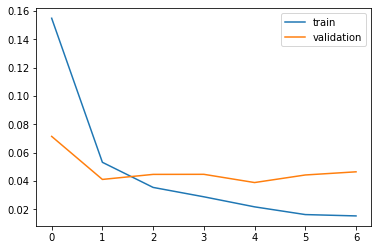

In [22]:
plt.plot(r.history['loss'], label = 'train')
plt.plot(r.history['val_loss'], label= 'validation')
plt.legend()

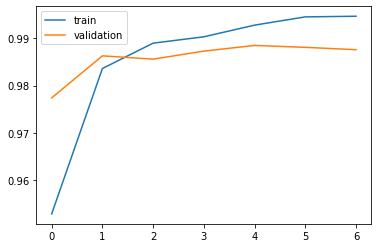

In [23]:
plt.plot(r.history['accuracy'], label = 'train')
plt.plot(r.history['val_accuracy'], label = 'validation')
plt.legend()

In [24]:
pp = model.predict(xtest)

313/313 [==============================] - 4s 10ms/step


In [25]:
pp[0]

array([3.7780463e-09, 9.6811457e-09, 4.0689240e-08, 8.3795006e-09,
       1.5645722e-07, 2.7551768e-09, 1.4406028e-12, 9.9999362e-01,
       2.8536103e-08, 6.0997204e-06], dtype=float32)

In [26]:
pp.shape

(10000, 10)

In [27]:
ppp=[]
for i  in range(10000):
    x = pp[i,:].argmax()
    ppp.append(x)

In [33]:
x=np.random.randint(10000)
y1=ppp[x]
y2=ytest[x]
print(y1)
print(y2)

7
7
